<a href="https://colab.research.google.com/github/Technology-for-the-Poorest-Billion/2024-ideabatic-smirk/blob/main/Final_design_analysis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T_atm = 27                  #avg temperature in Cameroon
T_ice = 0                   #surface temp of ice block
T_ice_avg = -10                     #avg temp in ice block total vol
v = 1.2                   #walking speed
t = 0.2                   #box thickness (distance between haxagonal faces)
h_inner = 12.12                     #add this as upper bound for anaysis of heat transfer through vaccine chamber air gap
h_outer = 12.12-1.16*v+11.6*v**(1/2)                   #empirical relationship https://www.engineeringtoolbox.com/convective-heat-transfer-d_430.html - this is an empirical equation and can be used for velocities 2 to 20 m/s.
lambda_air = 0.02474                     #at 5 degrees  https://www.engineeringtoolbox.com/air-properties-viscosity-conductivity-heat-capacity-d_1509.html
lambda_shell = 0.18            #for ABS shell
lambda_car = lambda_shell
lambda_ins = 0.023          #thermal conductivity of the insulation material in W/meter Kelvin
lambda_gap = 0.3        #silicon foam or air?
t_shell = 0.002         #m
t_car = t_shell
t_ins_r = 0.035
t_gap_r = 0.005
print(h_outer)
#from inner to outer
r_ice = 0.05          #approximate bottle as 10x13cm for 1l
r_car_in = r_ice + t_gap_r
r_vac_in = r_car_in + t_car      #depends on gap and carousel material e.g. shell
r_vac_out = r_vac_in + 0.03       #space for vaccines
r_ins_in = r_vac_out + t_shell
r_ins_out = r_ins_in + t_ins_r
r_shell_out = r_ins_out + t_shell


23.435163334119853


0.247
Q_tot_l: 0.6701076275891571 J/s
40.292035022997375


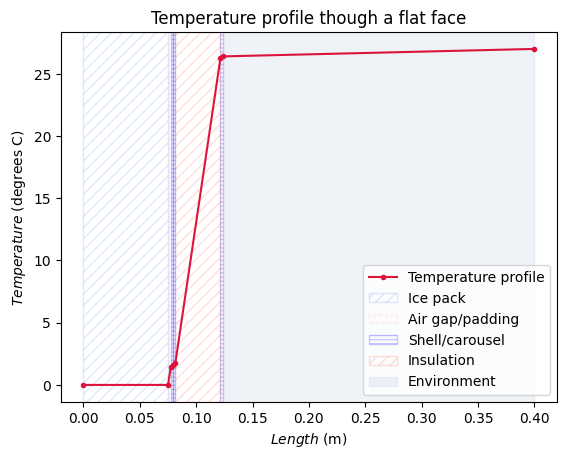

In [3]:
# Linear heat transfer
A = 2*np.pi*r_vac_out**2            #out of 2 faces
t_ins_l = 0.04               #insulation thickness above and below ice block
t_gap_l = 0.0025                #air gap above and below ice block

l_ice = 0.075         #approximate bottle as 10x15cm
l_gap = l_ice + t_gap_l
l_car_out = l_gap + t_car      #depends on gap and carousel material e.g. shell
l_ins_in = l_car_out + t_shell
l_ins_out = l_ins_in + t_ins_l
l_shell_out = l_ins_out + t_shell
#diatnce between hexagonal faces of smile
t = 2*(l_shell_out)
print(t)

#calculate thermal resistances for each component of coolbox in direction of heat transfer out of heaxagonal faces
R_gap_l = t_gap_l/(lambda_air*A)          #air/padding layer
R_carousel_l = t_car/(lambda_car*A)         #could also be air/padding layer
R_shell_in_l = t_shell/(lambda_shell*A)
R_ins_l = t_ins_l/(lambda_ins*A)
R_shell_out_l = t_shell/(lambda_shell*A)
R_conv_l = 1/(h_outer*A)

#sum thermal resistances
R_l = R_gap_l + R_carousel_l + R_shell_in_l + R_ins_l + R_shell_out_l + R_conv_l
Q_dot_l = (T_atm - T_ice)/R_l
#top + bottom (2 resistor networks in parallel?)
#R_tot_l = (2/(R_carousel_l + R_shell_in_l + R_ins_l + R_shell_out_l + R_conv_l))**(-1)
#Q_dot_tot_l = (T_atm - T_ice)/R_tot_l
print('Q_tot_l:',Q_dot_l, 'J/s')
print(R_l)

#temp difference across each layer/component
dt_gap_l = Q_dot_l*R_gap_l
dt_carousel_l = Q_dot_l*R_carousel_l
dt_shell_in_l = Q_dot_l*R_shell_in_l
dt_ins_l = Q_dot_l*R_ins_l
dt_shell_out_l = Q_dot_l*R_shell_out_l
dt_conv_l = Q_dot_l*R_conv_l

#Temperature at each interface between layers/components
T_gap_out_l = T_ice + dt_gap_l
T_car_out_l = T_gap_out_l + dt_carousel_l
T_ins_in_l = T_car_out_l + dt_shell_in_l
T_ins_out_l = T_ins_in_l + dt_ins_l
T_shell_out_l = T_ins_out_l + dt_shell_out_l
l_arr = [0,l_ice,l_gap,l_car_out,l_ins_in,l_ins_out,l_shell_out,0.4]
T_l_arr = [T_ice,T_ice,T_gap_out_l,T_car_out_l,T_ins_in_l,T_ins_out_l,T_shell_out_l,T_atm]

#Plot and label the temperature gradient through the material layers, approximating all gradients through materials as linear - not strictly true, especially in air gaps
plt.plot(l_arr, T_l_arr, marker='o', markersize=3, color='crimson', label='Temperature profile')
plt.xlabel('$Length$ (m)')
plt.ylabel('$Temperature$ (degrees C)')

#Plot the material components as ranges
plt.axvspan(0, l_ice, fc='none', ec='cornflowerblue', hatch='///', alpha=0.2, label='Ice pack')
plt.axvspan(l_ice, l_gap, fc='none', ec='pink', hatch='...', alpha=0.2, label='Air gap/padding')
plt.axvspan(l_gap, l_car_out, fc='none', ec='blue', hatch='----', alpha=0.2, label='Shell/carousel')
plt.axvspan(l_car_out, l_ins_in, fc='none', ec='blue', hatch='----', alpha=0.2)
plt.axvspan(l_ins_out, l_shell_out, fc='none', ec='blue', hatch='----', alpha=0.2)
plt.axvspan(l_ins_in, l_ins_out, fc='none', ec='tomato', hatch='///', alpha=0.2,label='Insulation')
plt.axvspan(l_shell_out, 0.40, fc='lightsteelblue', ec='lightsteelblue', alpha=0.2,label='Environment')
plt.legend(loc=0)
plt.title('Temperature profile though a flat face')
plt.show()

plt.show()

Q_dot_r: 1.286090882265042 J/s
0.05727695493575656
0.08136107752646758
0.20471101542288284
20.99385072417903


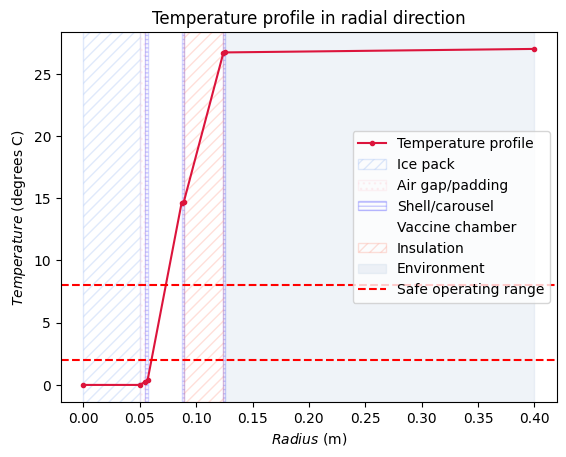

In [4]:
# Radial heat transfer

#Calulation of thermal resistances
R_gap_r = np.log(r_car_in/r_ice)/(2*np.pi*lambda_gap*t)             #can be changed from 'lambda_air' to 'lambda_gap' for different material in gap
R_carousel = np.log(r_vac_in/r_car_in)/(2*np.pi*lambda_car*t)
R_chamber = np.log(r_vac_out/r_vac_in)/(2*np.pi*lambda_air*t)
#R_chamber = (1/(np.log(r_vac_out/r_vac_in)/(2*np.pi*lambda_air*t)) + (2*np.pi*r_vac_in*t*h_inner))**(-1)
R_shell_in = np.log(r_ins_in/r_vac_out)/(2*np.pi*lambda_shell*t)
R_ins = np.log(r_ins_out/r_ins_in)/(2*np.pi*lambda_ins*t)
R_shell_out = np.log(r_shell_out/r_ins_out)/(2*np.pi*lambda_shell*t)
R_conv = 1/(2*np.pi*r_shell_out*t*h_outer)

#Sum all thermal resistances
R_tot_r = R_gap_r + R_carousel + R_chamber + R_shell_in + R_ins + R_shell_out + R_conv
Q_dot_r = (T_atm - T_ice)/R_tot_r
print('Q_dot_r:',Q_dot_r, 'J/s')
print(R_shell_out)
print(R_shell_in)
print(R_gap_r)
print(R_tot_r)

#temp difference across each layer/component
dt_gap_r = Q_dot_r*R_gap_r
dt_carousel_r = Q_dot_r*R_carousel
dt_chamber_r = Q_dot_r*R_chamber
dt_shell_in_r = Q_dot_r*R_shell_in
dt_ins_r = Q_dot_r*R_ins
dt_shell_out_r = Q_dot_r*R_shell_out
dt_conv_r = Q_dot_r*R_conv

#Temperature at each interface between layers/components
T_car_in_r = T_ice + dt_gap_r
T_vac_in_r = T_car_in_r + dt_carousel_r
T_vac_out_r = T_vac_in_r + dt_chamber_r
T_ins_in_r = T_vac_out_r + dt_shell_in_r
T_ins_out_r = T_ins_in_r + dt_ins_r
T_shell_out_r = T_ins_out_r + dt_shell_out_r
r_arr = [0,r_ice,r_car_in,r_vac_in,r_vac_out,r_ins_in,r_ins_out,r_shell_out,0.4]
T_r_arr = [T_ice,T_ice,T_car_in_r,T_vac_in_r,T_vac_out_r,T_ins_in_r,T_ins_out_r,T_shell_out_r,T_atm]

#Plot and label the temperature gradient through the material layers, approximating all gradients through materials as linear - not strictly true, especially in air gaps
plt.plot(r_arr, T_r_arr, marker='o', markersize=3, color='crimson', label='Temperature profile')
plt.xlabel('$Radius$ (m)')
plt.ylabel('$Temperature$ (degrees C)')

#Plot the material components as ranges
plt.axvspan(0, r_ice, fc='none', ec='cornflowerblue', hatch='///', alpha=0.2, label='Ice pack')
plt.axvspan(r_ice, r_car_in, fc='none', ec='pink', hatch='...', alpha=0.2, label='Air gap/padding')
plt.axvspan(r_car_in, r_vac_in, fc='none', ec='blue', hatch='----', alpha=0.2, label='Shell/carousel')
plt.axvspan(r_vac_out, r_ins_in, fc='none', ec='blue', hatch='----', alpha=0.2)
plt.axvspan(r_ins_out, r_shell_out, fc='none', ec='blue', hatch='----', alpha=0.2)
plt.axvspan(r_vac_in, r_vac_out, fc='none', ec='white', hatch='///', alpha=0.2,label='Vaccine chamber')
plt.axvspan(r_ins_in, r_ins_out, fc='none', ec='tomato', hatch='///', alpha=0.2,label='Insulation')
plt.axvspan(r_shell_out, 0.40, fc='lightsteelblue', ec='lightsteelblue', alpha=0.2,label='Environment')
#Plot temperature range required for vaccine storage
plt.axhline(2, linestyle='--', color='red', label='Safe operating range')
plt.axhline(8, linestyle='--',color='red')
plt.legend(loc=0)
plt.title('Temperature profile in radial direction')
plt.show()

plt.show()

In [5]:
# 3D approximation- combination of 2 resistor networks in parallel
R_tot = (1/(R_tot_r)+1/(R_l))**(-1)
Q_dot = (T_atm - T_ice)/R_tot
print('Q_dot:',Q_dot, 'J/s')

Q_dot: 1.9561985098541992 J/s


In [6]:
# Time vaccine chamber is in deisred temp range 2-8 degrees
cp_ice = 2050
cp_water = 4180
m = r_ice**2*np.pi*2*l_ice*1000 #mass of the water before freezing
print(m)
Q = m*cp_ice*(0 - T_ice_avg) + 334*1000*m + m*cp_water*(6 - 0) #inc latent heat of melting
print(Q)
time = Q/Q_dot
hours = time/3600
print(hours)
print(t)

1.1780972450961724
447182.1522936051
63.49931456356117
0.247
